# PyTorch Workflow

What we're covering:
  
  - Data (prepare and load)
  - Build model 
  - Fitting the model to data (training)
  - Making predictions and evaluating a model (inference)
  - Saving and loading a model
  - Putting it all together 

In [69]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as pyplot

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

## 1. Data (preparing and loading)



We'll use a linear regression formula to make a straight line with known `parameters`

In [70]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
print(f"First 10 samples of X: {X[:10]}")
print(f"First 10 samples of y: {y[:10]}")
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

First 10 samples of X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
First 10 samples of y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
Length of X: 50
Length of y: 50


### Splitting data into training and test sets

In [71]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [72]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

In [73]:
import matplotlib.pyplot as plt

In [74]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compratres predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

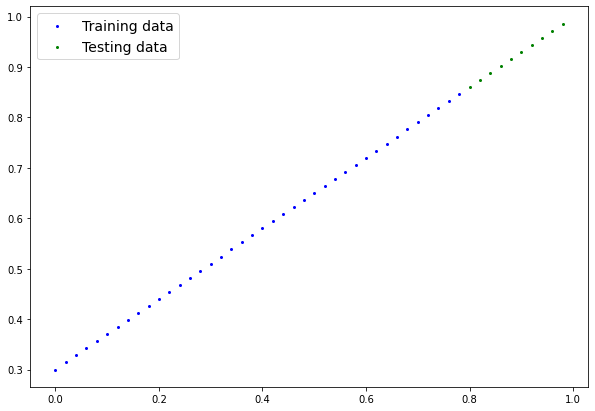

In [75]:
plot_predictions()

## 2. Building the model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

It does this through 2 main algorithms:
1. Gradient descent
2. Backpropagation

In [76]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    # torch.randn() returns a tensor filled with random numbers
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True, # allows gradient descent, also true by default
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, 
                                         requires_grad=True,
                                         dtype=torch.float))
    
    # Forward method to define the computation in the mode
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # linear regression formula

In [77]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (neural networks)
* torch.nn.Parameter - what parameters the model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for neural network modules, if you subclass it. you should overwrite forward()
* def forward(): All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent

In [78]:
torch.randn(1)

tensor([0.3367])

### Checking the contents of our PyTorch model

In [79]:
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [80]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [81]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

In [82]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [83]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

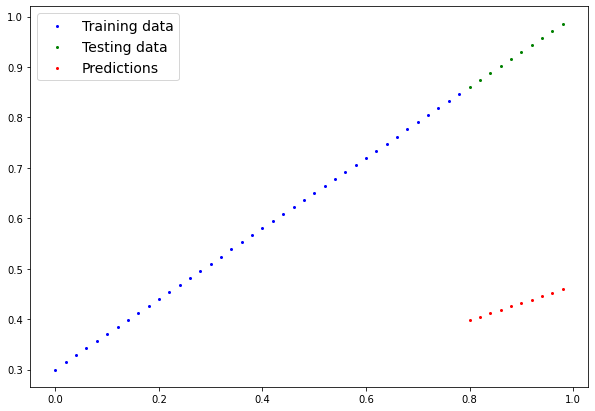

In [84]:
plot_predictions(predictions=y_preds)

## 3. Train Model

One way to measue how wrong your models predictions are is to use a loss (cost) functions.

Things we need to train:

* **Loss Function:** A function to measue how wrong your model's predictions are to the ideal outputs.

* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias) to improve the loss function

And specifically for PyTorch we need:
- A training loop
- A testing loop

In [85]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [86]:
# Checking our models parameters (parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [87]:
# Setup a loss functin
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr: learning rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data through our model's `forward()` functions) to make predictions - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with resptect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [88]:
torch.manual_seed(42)

# An epoch is a loop through the data (this is a hyperparameter beacuse we'set it ourselves)
epochs = 100

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradents to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Optimzer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Set the opitimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate the loop. So we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off gradient tracking

  # Print out model state_dict()
  print(model_0.state_dict())

Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Loss: 0.19767

In [89]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

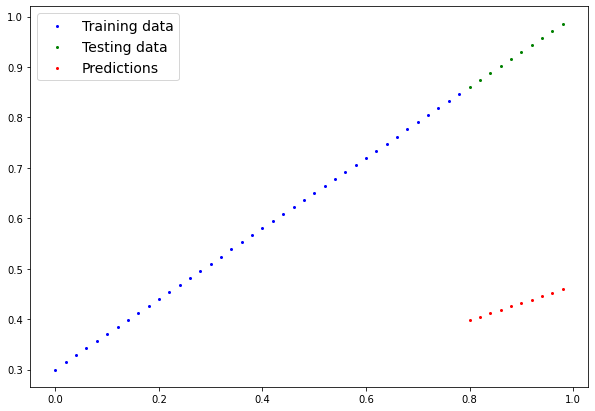

In [90]:
plot_predictions(predictions=y_preds);

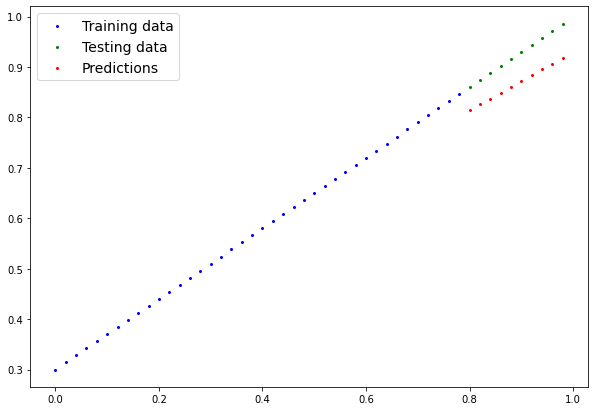

In [91]:
plot_predictions(predictions=y_preds_new);